In [5]:
install.packages("forecast", repos = "http://cran.us.r-project.org")
install.packages("data.table", dependencies=TRUE,repos = "http://cran.us.r-project.org")
library(data.table)

train <- fread("D:/ADS/ads_team_7-ads_midterm_team7-276bcb1fad71/files/cleaned_historical_data1_Q22005.csv",select=c('CREDIT SCORE', 'FIRST PAYMENT YEAR', 'FIRST PAYMENT MONTH',
                                                                   'MATURITY YEAR', 'MATURITY MONTH',
                           'METROPOLITAN STATISTICAL AREA (MSA) OR METROPOLITAN DIVISION', 
                           'MORTGAGE INSURANCE PERCENTAGE (MI %)', 'NUMBER OF UNITS',
                           'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 
                           'ORIGINAL UPB', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'ORIGINAL INTEREST RATE',
                           'POSTAL CODE','ORIGINAL LOAN TERM','NUMBER OF BORROWERS', 'FIRST TIME HOMEBUYER FLAG YES',
                           'FIRST TIME HOMEBUYER FLAG NO', 'FIRST TIME HOMEBUYER FLAG NA','METROPOLITAN_AREA_FLAG', 'MORTGAGE_INSURANCE_FLAG', 'OWNER OCCUPIED FLAG', 'INVESTMENT PROPERTY FLAG', 
                           'SECOND HOME SPACE FLAG', 'RETAIL CHANNEL FLAG', 'BROKER CHANNEL FLAG', 'CORRESPONDENT CHANNEL FLAG',
                           'TP0 NOT SPECIFIED CHANNEL FLAG', 'PREPAYMENT PENALTY MORTGAGE (PPM) FLAG YES', 
                           'PREPAYMENT PENALTY MORTGAGE (PPM) FLAG NO', 'FIXED RATE MORTGAGE PRODUCT TYPE FLAG YES', 
                           'FIXED RATE MORTGAGE PRODUCT TYPE FLAG NO', 'CONDO PROPERTY TYPE FLAG', 'LEASE HOLD PROPERTY TYPE FLAG',
                           'PUD PROPERTY TYPE FLAG', 'MANUFACTURE HOUSING PROPERTY TYPE FLAG', 'FREE SIMPLE HOUSING PROPERTY TYPE FLAG', 
                           'CO OP HOUSING PROPERTY TYPE FLAG', 'ORIGINATION YEAR', 'ORIGINATION QUARTER', 'LOAN PURPOSE IS PURCHASE FLAG',
                           'LOAN PURPOSE IS CASH OUT REFINANCE FLAG', 'LOAN PURPOSE IS NO CASH OUT REFINANCE FLAG',
                           'SUPER CONFORMING FLAG YES', 'SUPER CONFORMING FLAG NO'))


Read 405422 rows and 45 (of 59) columns from 0.082 GB file in 00:00:04


In [6]:
head(train)

CREDIT SCORE,FIRST PAYMENT YEAR,FIRST PAYMENT MONTH,MATURITY YEAR,MATURITY MONTH,METROPOLITAN STATISTICAL AREA (MSA) OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE (MI %),NUMBER OF UNITS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME (DTI) RATIO,...,MANUFACTURE HOUSING PROPERTY TYPE FLAG,FREE SIMPLE HOUSING PROPERTY TYPE FLAG,CO OP HOUSING PROPERTY TYPE FLAG,ORIGINATION YEAR,ORIGINATION QUARTER,LOAN PURPOSE IS PURCHASE FLAG,LOAN PURPOSE IS CASH OUT REFINANCE FLAG,LOAN PURPOSE IS NO CASH OUT REFINANCE FLAG,SUPER CONFORMING FLAG YES,SUPER CONFORMING FLAG NO
715,2005,8,2035,7,33700,0,1,58,41,...,0,1,0,5,2,0,1,0,0,1
743,2005,8,2035,7,0,0,1,80,36,...,0,1,0,5,2,0,0,1,0,1
772,2005,8,2035,7,37860,0,1,80,34,...,0,0,0,5,2,1,0,0,0,1
773,2005,7,2035,6,0,0,1,64,60,...,0,1,0,5,2,0,0,1,0,1
647,2005,8,2035,7,0,30,1,91,28,...,0,1,0,5,2,0,0,1,0,1
748,2005,6,2035,5,36740,25,1,86,22,...,0,1,0,5,2,1,0,0,0,1


In [7]:
colnames(train) <- c('CREDITSCORE','FIRSTPAYMENTYEAR','FIRSTPAYMENTMONTH',
'MATURITYYEAR','MATURITYMONTH',
'METROPOLITANSTATISTICALAREA(MSA)ORMETROPOLITANDIVISION',
'MORTGAGEINSURANCEPERCENTAGE(MI%)','NUMBEROFUNITS',
'ORIGINALCOMBINEDLOAN-TO-VALUE(CLTV)','ORIGINALDEBT-TO-INCOME(DTI)RATIO',
'ORIGINALUPB','ORIGINALLOAN-TO-VALUE(LTV)','ORIGINALINTERESTRATE',
'POSTALCODE','ORIGINALLOANTERM','NUMBEROFBORROWERS','FIRSTTIMEHOMEBUYERFLAGYES',
'FIRSTTIMEHOMEBUYERFLAGNO','FIRSTTIMEHOMEBUYERFLAGNA','METROPOLITAN_AREA_FLAG','MORTGAGE_INSURANCE_FLAG','OWNEROCCUPIEDFLAG','INVESTMENTPROPERTYFLAG',
'SECONDHOMESPACEFLAG','RETAILCHANNELFLAG','BROKERCHANNELFLAG','CORRESPONDENTCHANNELFLAG',
'TP0NOTSPECIFIEDCHANNELFLAG','PREPAYMENTPENALTYMORTGAGE(PPM)FLAGYES',
'PREPAYMENTPENALTYMORTGAGE(PPM)FLAGNO','FIXEDRATEMORTGAGEPRODUCTTYPEFLAGYES',
'FIXEDRATEMORTGAGEPRODUCTTYPEFLAGNO','CONDOPROPERTYTYPEFLAG','LEASEHOLDPROPERTYTYPEFLAG',
'PUDPROPERTYTYPEFLAG','MANUFACTUREHOUSINGPROPERTYTYPEFLAG','FREESIMPLEHOUSINGPROPERTYTYPEFLAG',
'COOPHOUSINGPROPERTYTYPEFLAG','ORIGINATIONYEAR','ORIGINATIONQUARTER','LOANPURPOSEISPURCHASEFLAG',
'LOANPURPOSEISCASHOUTREFINANCEFLAG','LOANPURPOSEISNOCASHOUTREFINANCEFLAG',
'SUPERCONFORMINGFLAGYES','SUPERCONFORMINGFLAGNO')



In [8]:
#library(ISLR)
# install.packages("forecast", repos = "http://cran.us.r-project.org")
library(forecast)
# regfit.full('Credit Score'~., data=test)
# summary(regfit.full)
lm.fit = lm(ORIGINALINTERESTRATE ~ .,data = train)
summary(lm.fit)

Warning message:
"package 'forecast' was built under R version 3.3.3"


Call:
lm(formula = ORIGINALINTERESTRATE ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68723 -0.16869 -0.00276  0.16019  2.83441 

Coefficients: (13 not defined because of singularities)
                                                           Estimate Std. Error
(Intercept)                                              -2.146e+02  7.638e+00
CREDITSCORE                                              -7.178e-04  8.079e-06
FIRSTPAYMENTYEAR                                          8.531e-02  3.811e-03
FIRSTPAYMENTMONTH                                        -5.135e-02  1.023e-03
MATURITYYEAR                                              2.485e-02  8.331e-05
MATURITYMONTH                                            -2.845e-02  1.002e-03
`METROPOLITANSTATISTICALAREA(MSA)ORMETROPOLITANDIVISION`  6.971e-07  4.360e-08
`MORTGAGEINSURANCEPERCENTAGE(MI%)`                        1.775e-04  2.286e-05
NUMBEROFUNITS                                             1.218e-02 

In [9]:
test <- fread("D:/ADS/ads_team_7-ads_midterm_team7-276bcb1fad71/files/cleaned_historical_data1_Q32005.csv",select=c('CREDIT SCORE', 'FIRST PAYMENT YEAR', 'FIRST PAYMENT MONTH',
                                                                   'MATURITY YEAR', 'MATURITY MONTH',
                           'METROPOLITAN STATISTICAL AREA (MSA) OR METROPOLITAN DIVISION', 
                           'MORTGAGE INSURANCE PERCENTAGE (MI %)', 'NUMBER OF UNITS',
                           'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 
                           'ORIGINAL UPB', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'ORIGINAL INTEREST RATE',
                           'POSTAL CODE','ORIGINAL LOAN TERM','NUMBER OF BORROWERS', 'FIRST TIME HOMEBUYER FLAG YES',
                           'FIRST TIME HOMEBUYER FLAG NO', 'FIRST TIME HOMEBUYER FLAG NA','METROPOLITAN_AREA_FLAG', 'MORTGAGE_INSURANCE_FLAG', 'OWNER OCCUPIED FLAG', 'INVESTMENT PROPERTY FLAG', 
                           'SECOND HOME SPACE FLAG', 'RETAIL CHANNEL FLAG', 'BROKER CHANNEL FLAG', 'CORRESPONDENT CHANNEL FLAG',
                           'TP0 NOT SPECIFIED CHANNEL FLAG', 'PREPAYMENT PENALTY MORTGAGE (PPM) FLAG YES', 
                           'PREPAYMENT PENALTY MORTGAGE (PPM) FLAG NO', 'FIXED RATE MORTGAGE PRODUCT TYPE FLAG YES', 
                           'FIXED RATE MORTGAGE PRODUCT TYPE FLAG NO', 'CONDO PROPERTY TYPE FLAG', 'LEASE HOLD PROPERTY TYPE FLAG',
                           'PUD PROPERTY TYPE FLAG', 'MANUFACTURE HOUSING PROPERTY TYPE FLAG', 'FREE SIMPLE HOUSING PROPERTY TYPE FLAG', 
                           'CO OP HOUSING PROPERTY TYPE FLAG', 'ORIGINATION YEAR', 'ORIGINATION QUARTER', 'LOAN PURPOSE IS PURCHASE FLAG',
                           'LOAN PURPOSE IS CASH OUT REFINANCE FLAG', 'LOAN PURPOSE IS NO CASH OUT REFINANCE FLAG',
                           'SUPER CONFORMING FLAG YES', 'SUPER CONFORMING FLAG NO'))


colnames(test) <- c('CREDITSCORE','FIRSTPAYMENTYEAR','FIRSTPAYMENTMONTH',
'MATURITYYEAR','MATURITYMONTH',
'METROPOLITANSTATISTICALAREA(MSA)ORMETROPOLITANDIVISION',
'MORTGAGEINSURANCEPERCENTAGE(MI%)','NUMBEROFUNITS',
'ORIGINALCOMBINEDLOAN-TO-VALUE(CLTV)','ORIGINALDEBT-TO-INCOME(DTI)RATIO',
'ORIGINALUPB','ORIGINALLOAN-TO-VALUE(LTV)','ORIGINALINTERESTRATE',
'POSTALCODE','ORIGINALLOANTERM','NUMBEROFBORROWERS','FIRSTTIMEHOMEBUYERFLAGYES',
'FIRSTTIMEHOMEBUYERFLAGNO','FIRSTTIMEHOMEBUYERFLAGNA','METROPOLITAN_AREA_FLAG','MORTGAGE_INSURANCE_FLAG','OWNEROCCUPIEDFLAG','INVESTMENTPROPERTYFLAG',
'SECONDHOMESPACEFLAG','RETAILCHANNELFLAG','BROKERCHANNELFLAG','CORRESPONDENTCHANNELFLAG',
'TP0NOTSPECIFIEDCHANNELFLAG','PREPAYMENTPENALTYMORTGAGE(PPM)FLAGYES',
'PREPAYMENTPENALTYMORTGAGE(PPM)FLAGNO','FIXEDRATEMORTGAGEPRODUCTTYPEFLAGYES',
'FIXEDRATEMORTGAGEPRODUCTTYPEFLAGNO','CONDOPROPERTYTYPEFLAG','LEASEHOLDPROPERTYTYPEFLAG',
'PUDPROPERTYTYPEFLAG','MANUFACTUREHOUSINGPROPERTYTYPEFLAG','FREESIMPLEHOUSINGPROPERTYTYPEFLAG',
'COOPHOUSINGPROPERTYTYPEFLAG','ORIGINATIONYEAR','ORIGINATIONQUARTER','LOANPURPOSEISPURCHASEFLAG',
'LOANPURPOSEISCASHOUTREFINANCEFLAG','LOANPURPOSEISNOCASHOUTREFINANCEFLAG',
'SUPERCONFORMINGFLAGYES','SUPERCONFORMINGFLAGNO')



Read 533371 rows and 45 (of 59) columns from 0.107 GB file in 00:00:07


In [10]:
pred = predict(lm.fit, test)
accuracy(pred, train$ORIGINALINTERESTRATE)

Warning message in predict.lm(lm.fit, test):
"prediction from a rank-deficient fit may be misleading"

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1685502,0.3997372,0.3092227,2.573145,5.243713


In [11]:
#install.packages('ISLR',repos = "http://cran.us.r-project.org")
#install.packages("leaps", repos = "http://cran.us.r-project.org")
library(leaps)
library(ISLR)
regfit.full = regsubsets(ORIGINALINTERESTRATE ~ .,data = train,method = "exhaustive",nv)
reg.summary = summary(regfit.full)
reg.summary


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"13  linear dependencies found"

Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(ORIGINALINTERESTRATE ~ ., data = train, method = "exhaustive")
44 Variables  (and intercept)
                                                         Forced in Forced out
CREDITSCORE                                                  FALSE      FALSE
FIRSTPAYMENTYEAR                                             FALSE      FALSE
FIRSTPAYMENTMONTH                                            FALSE      FALSE
MATURITYYEAR                                                 FALSE      FALSE
MATURITYMONTH                                                FALSE      FALSE
`METROPOLITANSTATISTICALAREA(MSA)ORMETROPOLITANDIVISION`     FALSE      FALSE
`MORTGAGEINSURANCEPERCENTAGE(MI%)`                           FALSE      FALSE
NUMBEROFUNITS                                                FALSE      FALSE
`ORIGINALCOMBINEDLOAN-TO-VALUE(CLTV)`                        FALSE      FALSE
`ORIGINALDEBT-TO-INCOME(DTI)RATIO`                           FALSE      FALSE


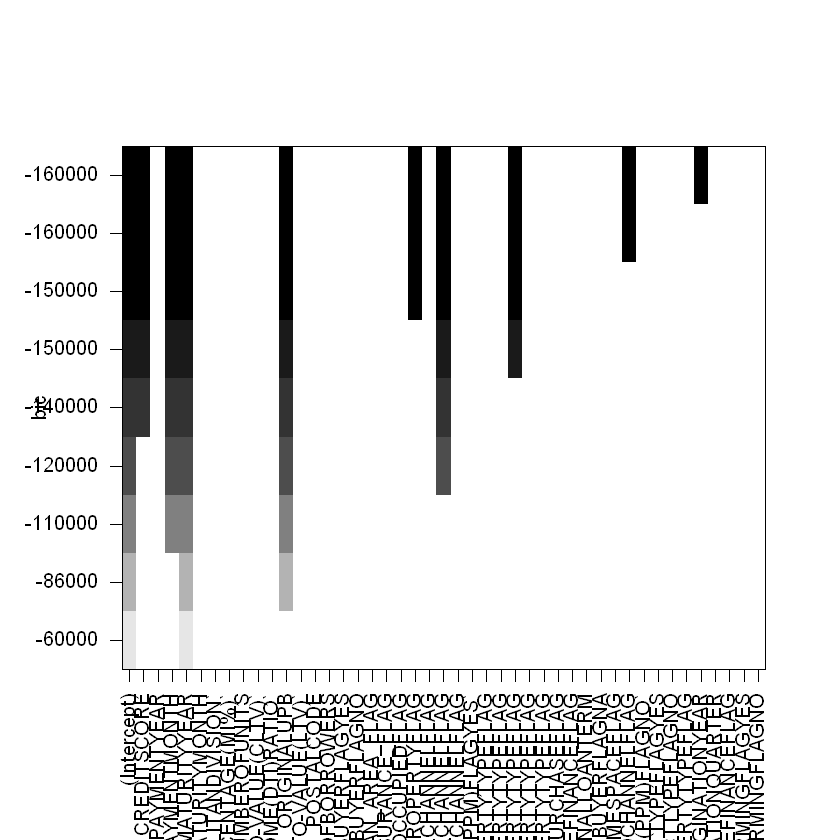

In [12]:
plot(regfit.full)

In [13]:

reg.summary$rss
reg.summary$adjr2

[1] 42919.65 40257.49 37991.08 36788.10 35588.46 34828.90 34207.01 33902.10
[9] 33578.03

[1] 0.1385041 0.1919376 0.2374279 0.2615729 0.2856508 0.3008953 0.3133765
[8] 0.3194953 0.3259986

(Intercept)                CREDITSCORE 
             -4.429739e+01              -9.353571e-04 
         FIRSTPAYMENTMONTH               MATURITYYEAR 
             -7.776857e-02               2.533985e-02 
               ORIGINALUPB     INVESTMENTPROPERTYFLAG 
             -7.810325e-07               3.269904e-01 
         BROKERCHANNELFLAG        PUDPROPERTYTYPEFLAG 
              1.575812e-01              -3.075857e-02 
TP0NOTSPECIFIEDCHANNELFLAG 
             -8.817782e-02

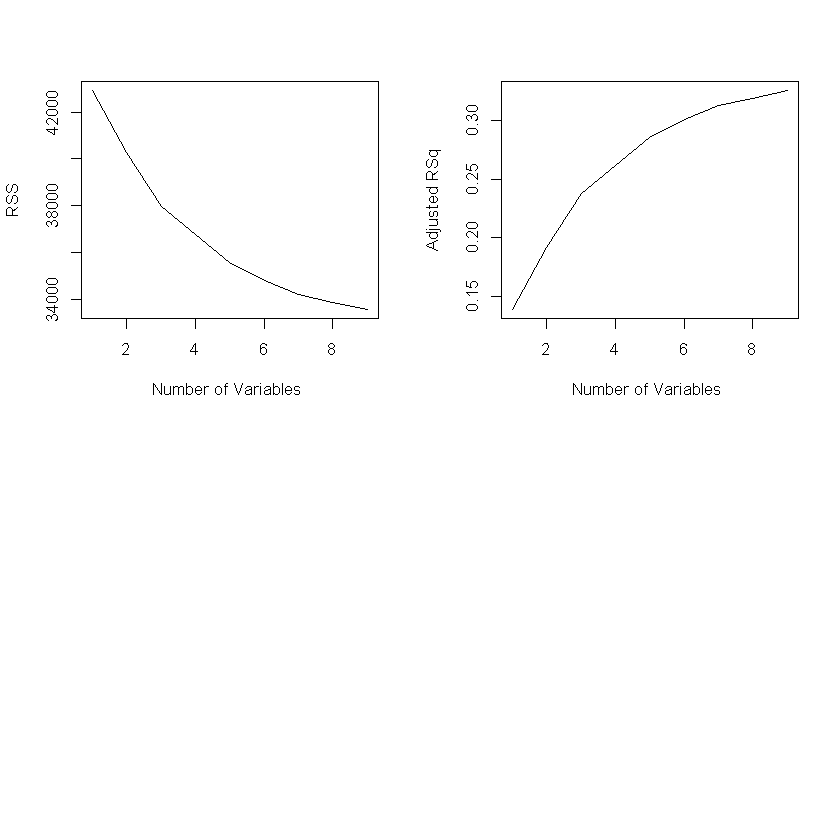

In [20]:
par(mfrow=c(2,2)) 
plot(reg.summary$rss ,xlab="Number of Variables ",ylab="RSS", type="l") 
plot(reg.summary$adjr2 ,xlab="Number of Variables ", ylab="Adjusted RSq",type="l")
coef(regfit.full ,8)

In [21]:
regfit.fwd=regsubsets(ORIGINALINTERESTRATE ~ .,data = train,method ="forward") 
F=summary(regfit.fwd)
names(F)
F
F$rss
F$adjr2
coef(regfit.fwd,6)

#### Backward selection
regfit.bwd=regsubsets(ORIGINALINTERESTRATE ~ .,data = train,method ="backward") 
B=summary(regfit.bwd)
names(B)
B
B$rss
B$adjr2
coef(regfit.bwd,6)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"13  linear dependencies found"

Reordering variables and trying again:


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Subset selection object
Call: regsubsets.formula(ORIGINALINTERESTRATE ~ ., data = train, method = "forward")
44 Variables  (and intercept)
                                                         Forced in Forced out
CREDITSCORE                                                  FALSE      FALSE
FIRSTPAYMENTYEAR                                             FALSE      FALSE
FIRSTPAYMENTMONTH                                            FALSE      FALSE
MATURITYYEAR                                                 FALSE      FALSE
MATURITYMONTH                                                FALSE      FALSE
`METROPOLITANSTATISTICALAREA(MSA)ORMETROPOLITANDIVISION`     FALSE      FALSE
`MORTGAGEINSURANCEPERCENTAGE(MI%)`                           FALSE      FALSE
NUMBEROFUNITS                                                FALSE      FALSE
`ORIGINALCOMBINEDLOAN-TO-VALUE(CLTV)`                        FALSE      FALSE
`ORIGINALDEBT-TO-INCOME(DTI)RATIO`                           FALSE      FALSE
ORI

[1] 42919.65 40257.50 37991.08 36788.10 35588.46 34828.90 34207.01 33902.10
[9] 33578.03

[1] 0.1385040 0.1919376 0.2374279 0.2615729 0.2856508 0.3008953 0.3133765
[8] 0.3194953 0.3259985

(Intercept)         CREDITSCORE   FIRSTPAYMENTMONTH        MATURITYYEAR 
      -4.260178e+01       -8.932186e-04       -7.770620e-02        2.448273e-02 
        ORIGINALUPB   BROKERCHANNELFLAG PUDPROPERTYTYPEFLAG 
      -9.106230e-07        2.308786e-01       -3.247830e-02

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"13  linear dependencies found"

Reordering variables and trying again:


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Subset selection object
Call: regsubsets.formula(ORIGINALINTERESTRATE ~ ., data = train, method = "backward")
44 Variables  (and intercept)
                                                         Forced in Forced out
CREDITSCORE                                                  FALSE      FALSE
FIRSTPAYMENTYEAR                                             FALSE      FALSE
FIRSTPAYMENTMONTH                                            FALSE      FALSE
MATURITYYEAR                                                 FALSE      FALSE
MATURITYMONTH                                                FALSE      FALSE
`METROPOLITANSTATISTICALAREA(MSA)ORMETROPOLITANDIVISION`     FALSE      FALSE
`MORTGAGEINSURANCEPERCENTAGE(MI%)`                           FALSE      FALSE
NUMBEROFUNITS                                                FALSE      FALSE
`ORIGINALCOMBINEDLOAN-TO-VALUE(CLTV)`                        FALSE      FALSE
`ORIGINALDEBT-TO-INCOME(DTI)RATIO`                           FALSE      FALSE
OR

[1] 42919.65 40257.50 37991.08 36788.10 35588.46 34891.34 34272.47 33968.24
[9] 33643.79

[1] 0.1385040 0.1919376 0.2374279 0.2615729 0.2856508 0.2996420 0.3120625
[8] 0.3181676 0.3246784

(Intercept)                             CREDITSCORE 
                          -4.247791e+01                           -8.960878e-04 
                      FIRSTPAYMENTMONTH                            MATURITYYEAR 
                          -7.759249e-02                            2.442113e-02 
                            ORIGINALUPB                       BROKERCHANNELFLAG 
                          -9.225328e-07                            2.193724e-01 
`PREPAYMENTPENALTYMORTGAGE(PPM)FLAGYES` 
                           2.897346e-01

In [1]:
install.packages("randomForest")
library (randomForest)



Warning message in install.packages("randomForest"):
"'lib = "C:/Program Files/Anaconda3/R/library"' is not writable"

ERROR: Error in install.packages("randomForest"): unable to install packages
